In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

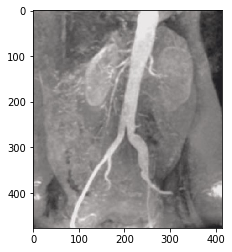

In [11]:
input_img = cv.imread('im_contrast_5.jpg')
plt.imshow(input_img)

In [12]:
img = np.asarray(input_img)

(array([1.3030e+03, 1.8470e+03, 2.0960e+03, 1.8970e+03, 2.1050e+03,
        3.0360e+03, 2.3530e+03, 2.7830e+03, 4.0580e+03, 4.2120e+03,
        4.9850e+03, 7.6990e+03, 6.8340e+03, 1.1594e+04, 9.7750e+03,
        1.1563e+04, 1.7486e+04, 1.9369e+04, 2.1779e+04, 3.2190e+04,
        3.6599e+04, 4.5760e+04, 5.7644e+04, 3.6632e+04, 3.1496e+04,
        3.7442e+04, 2.7879e+04, 2.7708e+04, 1.6792e+04, 1.3171e+04,
        1.2782e+04, 9.0730e+03, 8.4610e+03, 9.1830e+03, 6.2620e+03,
        4.8470e+03, 4.6130e+03, 3.0030e+03, 3.6410e+03, 3.3600e+03,
        3.5460e+03, 4.4580e+03, 3.9040e+03, 2.8890e+03, 2.2000e+03,
        1.7700e+03, 5.9300e+03, 2.3200e+03, 9.5000e+01, 1.0000e+01]),
 array([ 29.  ,  33.36,  37.72,  42.08,  46.44,  50.8 ,  55.16,  59.52,
         63.88,  68.24,  72.6 ,  76.96,  81.32,  85.68,  90.04,  94.4 ,
         98.76, 103.12, 107.48, 111.84, 116.2 , 120.56, 124.92, 129.28,
        133.64, 138.  , 142.36, 146.72, 151.08, 155.44, 159.8 , 164.16,
        168.52, 172.88, 177.24

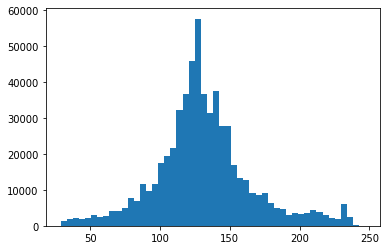

In [23]:
flat = img.flatten()
plt.hist(flat, bins=50)

$$P_x(j) = \sum_{i=0}^{j} P_x(i)$$

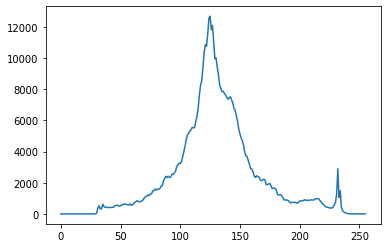

In [14]:
def get_histogram(image, bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel] += 1
    return histogram

hist = get_histogram(flat, 256)
plt.plot(hist)

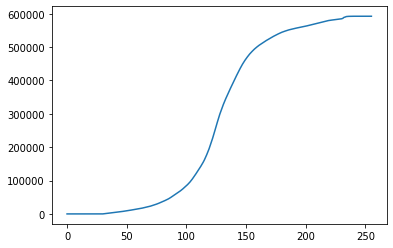

In [15]:
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)


cs = cumsum(hist)
plt.plot(cs)

Cumsum:
$$s_k = \sum_{j=0}^{k} {\frac{n_j}{N}}$$

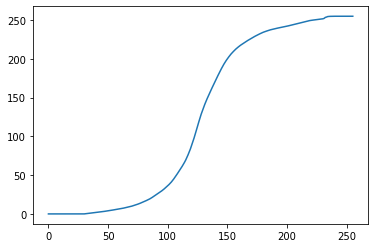

In [17]:
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()
cs = nj / N

plt.plot(cs)

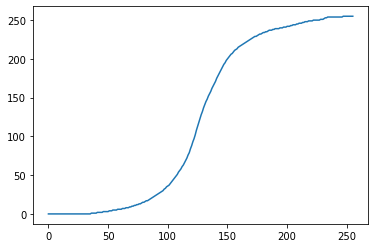

In [18]:
cs = cs.astype('uint8')
plt.plot(cs)

(array([13435., 11122., 12230., 10562., 11787., 12820.,  9437., 10240.,
        13111., 10251., 16262., 11071., 12200.,  6783., 15916.,  8552.,
         9405., 10379., 10876., 10765., 11546., 12573., 12691., 11826.,
        12099., 21028., 10018.,  9411.,  8920., 16335., 15722.,  7722.,
        15106.,  7370., 14966.,  7326., 13905., 12954., 11385., 10017.,
        16792., 10256., 13248., 11522., 12263., 11643., 11719., 11291.,
        11759., 11817.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

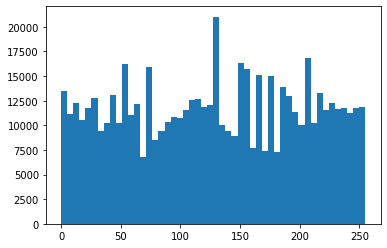

In [19]:
img_new = cs[flat]
plt.hist(img_new, bins=50)

In [20]:
img_new = np.reshape(img_new, img.shape)
img_new

array([[[218, 213, 212],
        [215, 209, 207],
        [207, 200, 198],
        ...,
        [  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3]],

       [[215, 209, 207],
        [211, 204, 202],
        [202, 193, 190],
        ...,
        [  2,   2,   2],
        [  2,   2,   3],
        [  2,   2,   2]],

       [[207, 200, 198],
        [202, 193, 190],
        [193, 181, 178],
        ...,
        [  2,   1,   2],
        [  2,   1,   2],
        [  2,   1,   2]],

       ...,

       [[ 23,  21,  21],
        [ 15,  14,  14],
        [ 13,  12,  12],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 23,  21,  21],
        [ 15,  14,  14],
        [ 13,  12,  12],
        ...,
        [  0,   0,   1],
        [  0,   0,   1],
        [  0,   0,   1]],

       [[ 22,  20,  20],
        [ 16,  15,  15],
        [ 15,  13,  13],
        ...,
        [  1,   1,   2],
        [  1,   1,   2],
        [  1,   1,   1]]

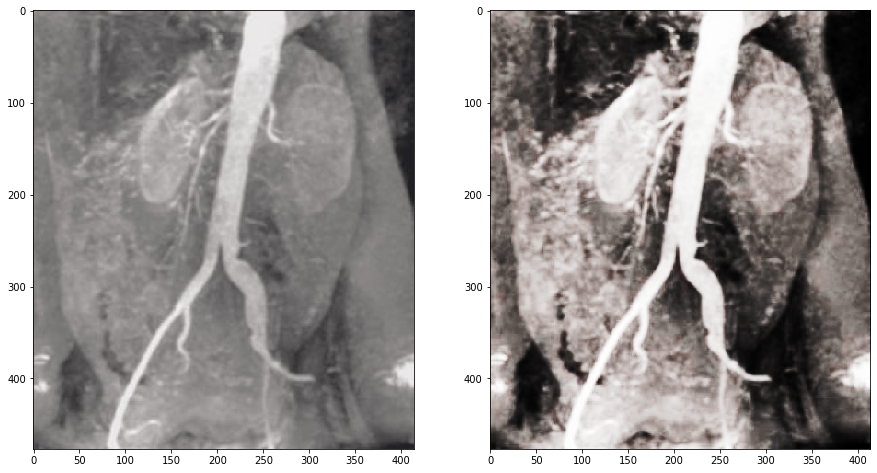

In [22]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')
plt.show(block=True)